# nsTa data porcessing, fitting and visualisation
## Importing requiered libraries

In [ ]:
# for interactivity
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline


# for data storing and easy manipulation and display
import pandas as pd
pd.options.display.float_format = '{:.1e}'.format # format the table diplay in scientific notation

# for fit and data processing
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import numpy as np
from math import ceil



# for plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# divers
import sys
%load_ext autoreload
%autoreload 2
#np.set_printoptions(threshold=sys.maxsize)

symfit documentation: 
https://symfit.readthedocs.io/en/latest/fitting_types.html#fitting-multiple-datasets


## import file
### & removing unnessesary data

In [3]:
data = pd.read_csv("nano_pebr2_map.csv")
data = data.drop(['21 600.00 nm','22 605.00 nm','Labels.1','11 650.00 nm','12 655.00 nm','13 660.00 nm','Labels.2','Unnamed: 49'],axis = 1)
data.head(5)

Labels  1 500.00 nm  2 505.00 nm  3 510.00 nm  4 515.00 nm  5 520.00 nm  \
0 0.0e+00      2.8e-04     -6.9e-05      2.7e-04      5.8e-04     -4.2e-04   
1 8.0e-01      4.8e-04     -1.8e-04      3.4e-04      5.2e-04     -3.4e-04   
2 1.6e+00      4.2e-04     -4.5e-05      5.2e-04      2.2e-04     -4.8e-04   
3 2.4e+00      8.6e-05     -7.8e-05      5.4e-04      6.5e-05     -1.7e-04   
4 3.2e+00      7.8e-05      2.7e-04      6.4e-04      1.9e-04     -1.6e-04   

   6 525.00 nm  7 530.00 nm  8 535.00 nm  9 540.00 nm  ...  2 655.00 nm  \
0      2.8e-04     -2.3e-05     -2.7e-04     -1.7e-04  ...      4.0e-04   
1      3.6e-04      3.2e-04     -2.5e-04     -3.9e-04  ...      4.8e-04   
2      3.0e-04      4.2e-05      4.1e-04     -5.1e-04  ...      6.0e-04   
3      2.4e-04     -1.6e-04      3.5e-04     -3.8e-04  ...      2.0e-04   
4      5.9e-04      3.2e-04      3.2e-04     -5.7e-04  ...      2.9e-04   

   3 660.00 nm  4 665.00 nm  5 670.00 nm  6 675.00 nm  7 680.00 nm  \
0      3.2e-05     -1.4e-04     -5.0e-05     -5.7e-06      4.3e-04   
1     -1.1e-04     -7.1e-04     -1.7e-05     -1.2e-04      8.8e-04   
2     -2.9e-04     -3.6e-04      7.6e-05      7.2e-05      5.7e-04   
3     -2.7e-04     -2.7e-04      3.3e-04      1.3e-04      3.3e-04   
4      2.5e-04     -4.2e-04      5.5e-04      3.8e-04      2.4e-04   

   8 685.00 nm  9 690.00 nm  10 695.00 nm  11 700.00 nm  
0      3.6e-04      3.6e-04       1.3e-04      -1.6e-04  
1      5.4e-04      7.4e-04       1.8e-04       5.7e-04  
2      7.2e-04      8.8e-04      -3.0e-04       7.4e-04  
3      4.3e-04      4.1e-04      -9.4e-05       9.4e-04  
4      3.8e-04      4.1e-04      -1.7e-04       7.7e-04  

[5 rows x 42 columns]

## renaming the column headers
extraction of the time vector in *time*

In [4]:
name = []
name.append('time ns')
for i in np.arange(500,705,5):
    name.append(i)
data.columns = name
time = pd.DataFrame()
time['time ns'] = data['time ns']

data.head(5)

time ns     500      505     510     515      520     525      530  \
0  0.0e+00 2.8e-04 -6.9e-05 2.7e-04 5.8e-04 -4.2e-04 2.8e-04 -2.3e-05   
1  8.0e-01 4.8e-04 -1.8e-04 3.4e-04 5.2e-04 -3.4e-04 3.6e-04  3.2e-04   
2  1.6e+00 4.2e-04 -4.5e-05 5.2e-04 2.2e-04 -4.8e-04 3.0e-04  4.2e-05   
3  2.4e+00 8.6e-05 -7.8e-05 5.4e-04 6.5e-05 -1.7e-04 2.4e-04 -1.6e-04   
4  3.2e+00 7.8e-05  2.7e-04 6.4e-04 1.9e-04 -1.6e-04 5.9e-04  3.2e-04   

       535      540  ...     655      660      665      670      675     680  \
0 -2.7e-04 -1.7e-04  ... 4.0e-04  3.2e-05 -1.4e-04 -5.0e-05 -5.7e-06 4.3e-04   
1 -2.5e-04 -3.9e-04  ... 4.8e-04 -1.1e-04 -7.1e-04 -1.7e-05 -1.2e-04 8.8e-04   
2  4.1e-04 -5.1e-04  ... 6.0e-04 -2.9e-04 -3.6e-04  7.6e-05  7.2e-05 5.7e-04   
3  3.5e-04 -3.8e-04  ... 2.0e-04 -2.7e-04 -2.7e-04  3.3e-04  1.3e-04 3.3e-04   
4  3.2e-04 -5.7e-04  ... 2.9e-04  2.5e-04 -4.2e-04  5.5e-04  3.8e-04 2.4e-04   

      685     690      695      700  
0 3.6e-04 3.6e-04  1.3e-04 -1.6e-04  
1 5.4e-04 7.4e-04  1.8e-04  5.7e-04  
2 7.2e-04 8.8e-04 -3.0e-04  7.4e-04  
3 4.3e-04 4.1e-04 -9.4e-05  9.4e-04  
4 3.8e-04 4.1e-04 -1.7e-04  7.7e-04  

[5 rows x 42 columns]

### plotting raw decays

In [20]:

@widgets.interact(curve=widgets.IntSlider(min=500,max=700,step=5,value=500), show_all = False)
def plot(curve,show_all):
    if show_all == True:
        fig, ax1 = plt.subplots(figsize = (15,10))
        colors = cm.jet(np.linspace(0, 1, len(data.columns)))
        data.plot(x = 'time ns', ax = ax1,color = colors)
        ax1.legend(loc = 'right')
        ax1.set_ylabel(r'$\Delta A$',fontsize = 20)
        ax1.set_xlabel('Time (ns)',fontsize = 20)
        ax1.axhline(linewidth=3, color='k')
    else:
        fig, ax1 = plt.subplots(figsize = (15,10))
        data[curve].plot(ax=ax1, color ='k', label = 'data')
        ax1.legend(loc = 'upper right')

    
    


interactive(children=(IntSlider(value=500, description='curve', max=700, min=500, step=5), Checkbox(value=Fals…

## smoothing data with sav. gol. algorythm & defining time zero

In [6]:
data_smoothed = data.iloc[750:,1:].apply(savgol_filter, axis = 0, args = (101,1)) ## smoothing, args containe the number of points to average and the polynomial order
#data_cut = data_smoothed.iloc[800:,:] # cuts the data at the peak ==> t = 0

time = time.iloc[0:len(data_smoothed)] # troncate time vector to the length od data_smooth

data_smoothed= data_smoothed.reset_index(drop = True) # reinitialize index to 0
data_smoothed= pd.concat([time,data_smoothed],axis= 1,ignore_index=False) # attached time vectroe to data_smooth
data_smoothed.set_index('time ns', inplace = True) # replace index by time vector and delet it from the dataframe

data_smoothed.head(5)

500      505      510      515      520      525      530  \
time ns                                                                  
0.0e+00 -1.1e-04 -2.6e-04 -1.2e-03 -1.5e-03 -3.1e-03 -2.7e-03 -3.1e-03   
8.0e-01 -1.2e-04 -2.7e-04 -1.2e-03 -1.5e-03 -3.1e-03 -2.7e-03 -3.1e-03   
1.6e+00 -1.2e-04 -2.9e-04 -1.2e-03 -1.5e-03 -3.1e-03 -2.7e-03 -3.1e-03   
2.4e+00 -1.3e-04 -3.0e-04 -1.2e-03 -1.5e-03 -3.1e-03 -2.7e-03 -3.1e-03   
3.2e+00 -1.4e-04 -3.1e-04 -1.2e-03 -1.5e-03 -3.0e-03 -2.7e-03 -3.1e-03   

             535      540      545  ...      655      660      665      670  \
time ns                             ...                                       
0.0e+00 -3.1e-03 -4.1e-03 -4.5e-03  ... -3.9e-03 -4.0e-03 -2.8e-03 -3.3e-03   
8.0e-01 -3.1e-03 -4.1e-03 -4.4e-03  ... -3.9e-03 -3.9e-03 -2.8e-03 -3.3e-03   
1.6e+00 -3.1e-03 -4.1e-03 -4.4e-03  ... -3.9e-03 -3.9e-03 -2.8e-03 -3.3e-03   
2.4e+00 -3.1e-03 -4.1e-03 -4.4e-03  ... -3.9e-03 -3.9e-03 -2.8e-03 -3.3e-03   
3.2e+00 -3.1e-03 -4.1e-03 -4.4e-03  ... -3.9e-03 -3.9e-03 -2.8e-03 -3.3e-03   

             675      680      685      690      695      700  
time ns                                                        
0.0e+00 -3.1e-03 -3.6e-03 -3.0e-03 -3.3e-03 -2.5e-03 -2.5e-03  
8.0e-01 -3.1e-03 -3.6e-03 -3.0e-03 -3.3e-03 -2.5e-03 -2.5e-03  
1.6e+00 -3.1e-03 -3.5e-03 -3.0e-03 -3.3e-03 -2.5e-03 -2.5e-03  
2.4e+00 -3.1e-03 -3.5e-03 -2.9e-03 -3.2e-03 -2.5e-03 -2.5e-03  
3.2e+00 -3.1e-03 -3.5e-03 -2.9e-03 -3.2e-03 -2.5e-03 -2.4e-03  

[5 rows x 41 columns]

plotting decays

In [21]:
@widgets.interact(curve=widgets.IntSlider(min=500,max=700,step=5,value=500), show_all = False)
def plot(curve,show_all):
    if show_all == True:
        colors = cm.jet(np.linspace(0, 1, len(data_smoothed.columns))) # create vector ith unic color for each curves
        fig, ax1 = plt.subplots(figsize = (15,10))
        data_smoothed.plot(ax = ax1, color = colors)
        ax1.legend(loc = 'right')
        ax1.set_ylabel(r'$\Delta A$',fontsize = 20)
        ax1.set_xlabel('Time (ns)',fontsize = 20)
        ax1.axhline(linewidth=3, color='k')
    else:
        colors = cm.jet(np.linspace(0, 1, len(data_smoothed.columns))) # create vector ith unic color for each curves
        fig, ax1 = plt.subplots(figsize = (15,10))
        data_smoothed[curve].plot(ax = ax1, color = colors)
        ax1.legend(loc = 'right')
        ax1.set_ylabel(r'$\Delta A$',fontsize = 20)
        ax1.set_xlabel('Time (ns)',fontsize = 20)
        ax1.axhline(linewidth=3, color='k')        

interactive(children=(IntSlider(value=500, description='curve', max=700, min=500, step=5), Checkbox(value=Fals…

## biexpoential fit : $ y = a_1e^{-x/t_1} + a_2e^{-x/t_2} + c$
fit parameters saved in *fit_result*, new decays saved in * fit_data*


In [10]:
x = time.iloc[0:len(data_smoothed)].to_numpy().reshape(len(time))
fit_data = pd.DataFrame(x, columns = ['time (ns)'])
fit_data.set_index('time (ns)', inplace = True)
fit_result = pd.DataFrame()

def func(x,a1,t1,a2,t2,c):
    return a1*np.exp(-x/t1)+a2*np.exp(-x/t2)+c

for curves in data_smoothed.columns:
    y = data_smoothed[curves].to_numpy()
    popt,pcov = curve_fit(func, x, y,bounds=[[-0.1,1000,-0.1,100,-1],[0.1,3000,0.1,1000,1]])
    fit_result[curves]=popt
    fit_data[curves] = func(x,*popt)

fit_result['parameters'] = ['a1','t1','a2','t2','c']
fit_result.set_index('parameters', inplace = True)
fit_result.head(5)

500      505      510      515      520      525      530  \
parameters                                                                  
a1          1.0e-03  8.0e-04  8.0e-04  6.5e-04  4.5e-04  3.9e-04  1.9e-04   
t1          1.6e+03  1.8e+03  1.0e+03  1.2e+03  1.6e+03  1.0e+03  1.0e+03   
a2          5.2e-04  9.7e-04 -4.6e-04 -8.2e-04 -1.6e-03 -1.7e-03 -2.1e-03   
t2          1.0e+02  1.0e+02  2.3e+02  1.9e+02  1.0e+02  1.7e+02  1.4e+02   
c          -1.8e-03 -2.5e-03 -1.7e-03 -1.6e-03 -1.7e-03 -1.6e-03 -1.4e-03   

                535      540      545  ...      655      660      665  \
parameters                             ...                              
a1          5.0e-05 -2.8e-04 -2.9e-04  ... -3.0e-04 -4.1e-04 -3.2e-04   
t1          1.3e+03  1.0e+03  3.0e+03  ...  2.8e+03  1.3e+03  1.0e+03   
a2         -1.8e-03 -2.3e-03 -2.5e-03  ... -3.1e-03 -2.6e-03 -2.0e-03   
t2          1.9e+02  1.3e+02  1.3e+02  ...  1.2e+02  1.3e+02  1.3e+02   
c          -1.3e-03 -1.4e-03 -1.4e-03  ... -6.3e-04 -6.6e-04 -7.0e-04   

                670      675      680      685      690      695      700  
parameters                                                                 
a1          3.9e-05 -2.2e-04 -3.2e-04 -3.4e-04 -3.9e-04 -3.7e-04 -5.4e-04  
t1          3.0e+03  3.0e+03  2.3e+03  3.0e+03  3.0e+03  1.0e+03  1.8e+03  
a2         -2.6e-03 -2.2e-03 -2.4e-03 -2.1e-03 -2.1e-03 -1.9e-03 -1.2e-03  
t2          1.8e+02  1.6e+02  1.4e+02  1.5e+02  1.3e+02  1.3e+02  1.0e+02  
c          -8.9e-04 -6.7e-04 -5.0e-04 -4.8e-04 -5.7e-04 -6.4e-04 -4.8e-04  

[5 rows x 41 columns]

## Plotting fits

In [11]:
## select wich curve to display
    
@widgets.interact(curve=widgets.IntSlider(min=500,max=700,step=5,value=500))
def plot(curve):
    fig, ax1 = plt.subplots(figsize = (15,10))
    fit_data[curve].plot(ax = ax1, color = 'r', label = 'fit')
    data_smoothed[curve].plot(ax=ax1, color ='k', label = 'data')
    ax1.legend(loc = 'upper right')

#----------

interactive(children=(IntSlider(value=500, description='curve', max=700, min=500, step=5), Output()), _dom_cla…

### Plotting the datas as a color map

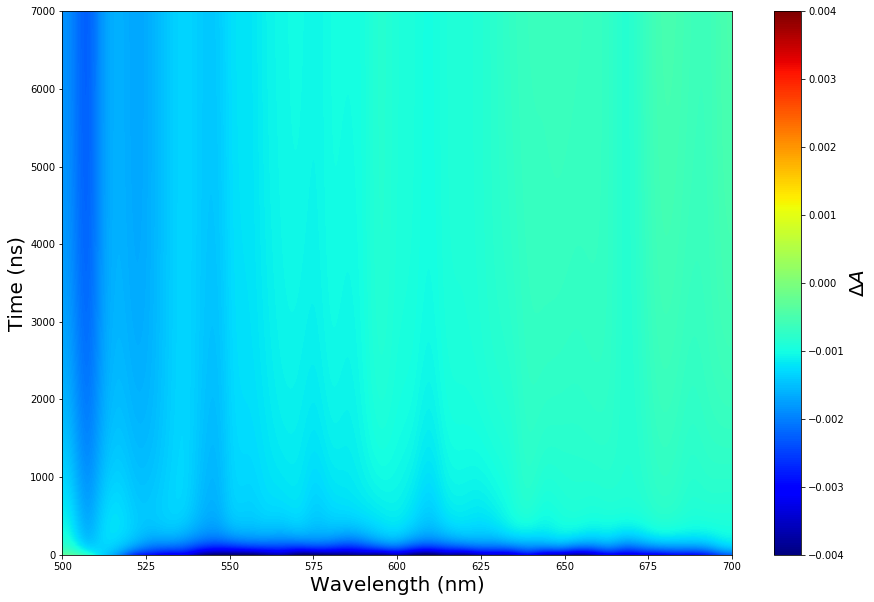

In [12]:
## selection of time window in (ns)
start = 0
stop = 7000 # max = 7000
#------------

## plotting
x, y = np.meshgrid(fit_data.columns,time)
plt.figure(figsize = (15,10)) # define the size of the figure in inches
plt.imshow(fit_data, cmap='jet', interpolation = 'bicubic',extent=(500,700,0,7000),aspect='auto', origin = 'lower')
cbar = plt.colorbar()
plt.xlabel('Wavelength (nm)',fontsize = 20)
plt.ylabel('Time (ns)',fontsize = 20)
plt.ylim(start,stop)
cbar.set_label(r'$\Delta A$', size = 20)
## define the color scale
plt.clim(-0.004,0.004) 
#------------

plt.show()

## slicing spectrum at delays
sliced spectrum saved in *spectra*

In [52]:
delay = np.array([0,50,100,150,200,250,300,350,400,500,1000,2000,5000,7000]) # delays selection

# creating new dataframe for the spectra
delay_index = np.ceil(delay/0.8)
spectra = fit_data.iloc[delay_index,:]
spectra = spectra.T
spectra.columns = delay

# plotting
colors = cm.jet(np.linspace(0, 1, len(spectra.columns)))

@widgets.interact(curve=widgets.SelectionRangeSlider(options = delay,index=(0,len(delay)-1)))
def plot(curve):
    start = curve[0]
    stop = curve[1]
    fig, ax1 = plt.subplots(figsize = (15,10))
    spectra.loc[:,start:stop].plot(ax = ax1,color = colors)
    ax1.axhline(linewidth=3, color='k')
    plt.ylim((-0.005,0))
    plt.show()

interactive(children=(SelectionRangeSlider(description='curve', index=(0, 13), options=(0, 50, 100, 150, 200, …

In [35]:
spectra.loc[:,0:100].head(4)

0        50       100
500 -2.7e-04 -5.1e-04 -6.6e-04
505 -7.1e-04 -1.1e-03 -1.4e-03
510 -1.4e-03 -1.3e-03 -1.3e-03
515 -1.7e-03 -1.6e-03 -1.5e-03

plt.subplot(2,1,1)
plt.plot(spectra)
plt.subplot(2,1,2)
plt.plot(data)
plt.show()